In [163]:
import pandas as pd
from sklearn.datasets import load_files
import re

In [164]:
discours = load_files('data/discours/', encoding='utf-8')

In [241]:
{i: j for i, j in zip(map(lambda x: x.split('\\')[-1], discours.filenames), map(lambda x: x[:40], discours.data))}

{'Arlette_Laguiller_299.txt': '\r\nTravailleuses, travailleurs, camarades',
 'François_Hollande_476.txt': '\r\nBonsoir Toulouse ! Quand je me suis dé',
 'Lionel_Jospin_497.txt': '\r\nMesdames et Messieurs,\r\nMes cher(e)s c',
 'François_Bayrou_156.txt': "\r\nMes premiers mots seront des mots d'ex",
 'Eva_Joly_339.txt': '\r\nChers amis,\r\nC’est ce soir le dernier ',
 'Marine_Le_Pen_553.txt': '\r\nC’est avec un immense plaisir que je p',
 'Nathalie_Arthaud_211.txt': '\r\nTravailleuses, travailleurs, camarades',
 'Nicolas_Sarkozy_701.txt': '\r\nMes chers amis, Je suis très heureux..',
 'François_Hollande_937.txt': '\r\nMes chers amis, vous êtes là ? Ca tomb',
 'Nicolas_Sarkozy_692.txt': '\r\nMes chers amis, c’est un bonheur que d',
 'Nicolas_Sarkozy_624.txt': '\r\nMes chers amis, Ils pensaient que vous',
 'Arlette_Laguiller_810.txt': '\r\nTravailleuses, travailleurs, camarades',
 'Jean-Pierre_Chevènement_818.txt': '\r\nHonneur au peuple français !\r\nJamais l',
 'Ségolène_Royal_401.txt':

In [307]:
from spacy.lang.fr import French
import spacy
nlp = spacy.load('fr_core_news_md')
import string

def lemmatizer(text):
    
    text_list = []
    tokens = nlp(text)
    lemma_list = []
    
    for token in tokens:
        if token in nlp.Defaults.stop_words:
            continue
        lemma_list.append(token.lemma_)

    return lemma_list

def preprocessor(text):
    if isinstance((text), (str)):
        text = text.replace('\r\n', ' ')
        text = re.sub("@\S+", "", text.lower())
        text = re.sub(r'http\S+', '', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = re.sub("[’«–…]", ' ', text)
        text = text[:-15]
    
        return text
    if isinstance((text), (list)):
        return_list = []
        for i in range(len(text)):
            temp_text = text.replace('\r\n', ' ')
            temp_text = re.sub("@\S+", "", temp_text.lower())
            temp_text = re.sub(r'http\S+', '', temp_text)
            temp_text = temp_text.translate(str.maketrans('', '', string.punctuation))
            temp_text = temp_text[:-15]
            return_list.append(temp_text)
        return(return_list)
    raise ValueError()

In [316]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


final_stopwords_list = stopwords.words('english') + stopwords.words('french')

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.2, stop_words=final_stopwords_list, 
                                   use_idf=True, preprocessor=preprocessor, 
                                   tokenizer=lemmatizer, ngram_range=(2, 2))

X = tfidf_vectorizer.fit_transform(discours['data'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaetd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Blue 
 ['Arlette_Laguiller_299.txt' 'Lionel_Jospin_497.txt'
 'François_Bayrou_156.txt' 'Arlette_Laguiller_810.txt'
 'Jean-Pierre_Chevènement_818.txt' 'Ségolène_Royal_401.txt'
 'Ségolène_Royal_890.txt' 'Marie-George_Buffet_194.txt'
 'Arlette_Laguiller_86.txt' 'François_Bayrou_814.txt'
 'Nicolas_Sarkozy_544.txt' 'Jacques_Chirac_638.txt'
 'François_Bayrou_965.txt' 'Arlette_Laguiller_765.txt'
 'Jacques_Chirac_624.txt' 'Jean-Marie_Le_Pen_922.txt'
 'Nicolas_Sarkozy_555.txt' 'Robert_Hue_991.txt' 'Robert_Hue_402.txt'
 'Arlette_Laguiller_38.txt' 'Nicolas_Sarkozy_187.txt' 'Robert_Hue_163.txt'
 'François_Bayrou_259.txt' 'Lionel_Jospin_300.txt' 'Lionel_Jospin_467.txt'
 'Lionel_Jospin_858.txt' 'Jacques_Chirac_60.txt'
 'Arlette_Laguiller_47.txt' 'François_Bayrou_257.txt'
 'Jacques_Chirac_514.txt' 'Jacques_Chirac_375.txt'
 'Arlette_Laguiller_70.txt' 'Robert_Hue_275.txt' 'Alain_Madelin_702.txt'
 'Jean-Pierre_Chevènement_504.txt' 'Corinne_Lepage_889.txt'
 'François_Bayrou_886.txt' 'Jean-Pierre_Chevènem

C:\Users\gaetd\anaconda3\lib\site-packages\graphtools\graphs.py:118: UserWarning: Building a kNNGraph on data of shape (95, 635) is expensive. Consider setting n_pca.
  warnings.warn(
C:\Users\gaetd\anaconda3\lib\site-packages\sklearn\neighbors\_base.py:462: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


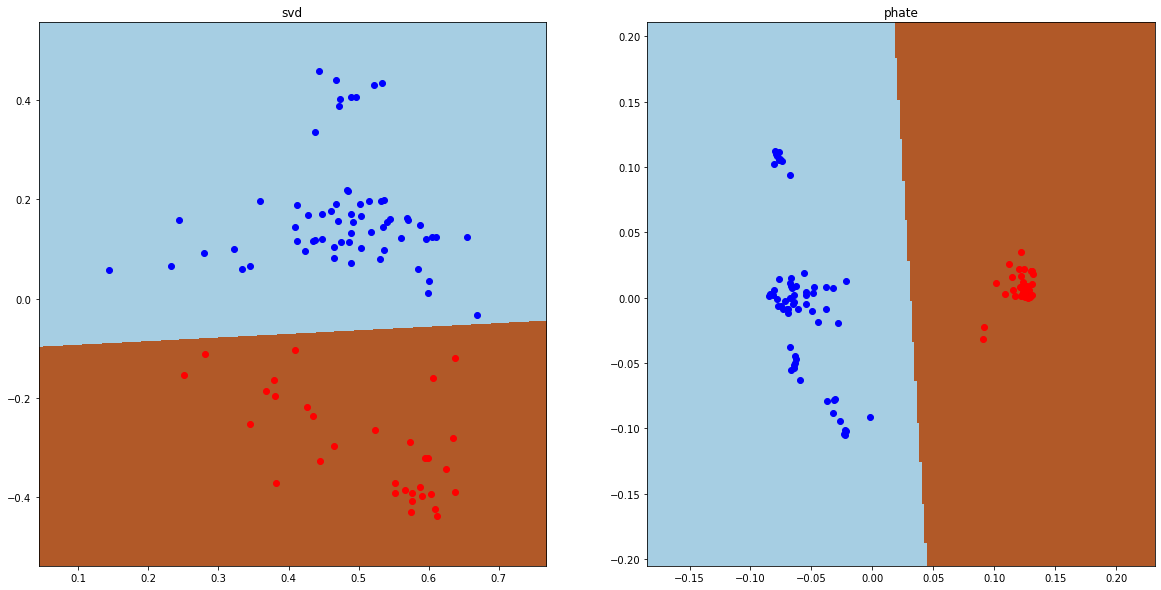

In [324]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import phate
from sklearn.decomposition import TruncatedSVD

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

svd = TruncatedSVD(n_components=2)
phate_operator = phate.PHATE(n_jobs=-2)

kmeans = KMeans(n_clusters=2, random_state=0)
    
def get_boundary_and_cluster(X, reduction_model, clustering_model, ax, title):

    reduced_data = reduction_model.fit_transform(X)
    cluster = clustering_model.fit_predict(reduced_data)

    h = .002

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - .1, reduced_data[:, 0].max() + .1
    y_min, y_max = reduced_data[:, 1].min() - .1, reduced_data[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clustering_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.imshow(Z, interpolation="nearest",
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired, aspect="auto", origin="lower")
    
    
    print("Blue \n", np.array(list(map(lambda x: x.split('\\')[-1], discours.filenames)))[~cluster.astype('bool')])
    print("red \n", np.array(list(map(lambda x: x.split('\\')[-1], discours.filenames)))[cluster.astype('bool')])

    ax.scatter(reduced_data[~cluster.astype('bool'), 0], reduced_data[~cluster.astype('bool'), 1], c='b')
    ax.scatter(reduced_data[cluster.astype('bool'), 0], reduced_data[cluster.astype('bool'), 1], c='r')
    ax.set_title(f"{title}")

get_boundary_and_cluster(X, svd, kmeans, axes[0], 'svd')
inertia_svd = kmeans.inertia_
get_boundary_and_cluster(X, phate_operator, kmeans, axes[1], 'phate')
inertia_phate = kmeans.inertia_

In [323]:
for i in np.argsort(svd.components_, axis=1)[:, :50].T:
    print(f"axis 0: {tfidf_vectorizer.get_feature_names()[i[0]]:20} | axis 1: {tfidf_vectorizer.get_feature_names()[i[1]]}")

axis 0: faire si             | axis 1: aujourd hui
axis 0: être considérer      | axis 1: dire    
axis 0: avoir contribuer     | axis 1: parce être
axis 0: responsable politique | axis 1:   avoir
axis 0: nont rien            | axis 1: parce avoir
axis 0: dire quelque         | axis 1:   »
axis 0: faire passer         | axis 1: avoir dire
axis 0: dizaine millier      | axis 1: dire   
axis 0: niveau vie           | axis 1: » être
axis 0: chose avoir          | axis 1:    être
axis 0: français pouvoir     | axis 1: être cela
axis 0: parce savoir         | axis 1:    avoir
axis 0: être menacer         | axis 1: 6 mai
axis 0: mettre tout          | axis 1: europe être
axis 0: national avoir       | axis 1: françois mitterrand
axis 0: être défendre        | axis 1: avoir vouloir
axis 0: public avoir         | axis 1: être avoir
axis 0: pourquoi être        | axis 1: être là
axis 0: année être           | axis 1: élection présidentiel
axis 0: aller plus           | axis 1: dire être
axis 0:

# Supervised learning

In [350]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X_pos = [text for name, text in zip(discours.filenames, discours.data) if 'François_Hollande' in name]
X_neg = [text for name, text in zip(discours.filenames, discours.data) if 'François_Hollande' not in name]
    
Y_pos = [1] * len(X_pos)
Y_neg = [0] * len(X_neg)

X_train, X_test, y_train, y_test = train_test_split(X_pos+X_neg, Y_pos+Y_neg, test_size=0.2)

X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

model =  GaussianNB()
model.fit(X_train.toarray(), y_train)

model.score(X_test.toarray(), y_test)

0.7894736842105263